In [ ]:
!apt-get update 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,550 kB]
Hit:13 http://pp

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
!tar xf spark-3.2.1-bin hadoop2.7.tgz

tar: spark-3.2.1-bin: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
import os
print(os.environ["SPARK_HOME"])

/usr/local/lib/python3.7/dist-packages/pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 50 kB/s 
     |████████████████████████████████| 199 kB 51.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=04cc9c68652e34e4f8eedeca07090989126e134f2533ac36a5ed434f10f3f9ea
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [3]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import findspark
findspark.init()
findspark.find()

'/usr/local/lib/python3.7/dist-packages/pyspark'

In [5]:
from pyspark import SparkContext

In [6]:
sc=SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [7]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Test').getOrCreate()

In [8]:
spark

In [12]:
#Question 1)  
%%time
 #File location and type 
path='/content/drive/MyDrive/covid-19.csv'
file_type ="csv"

 #using infer schema we import the file
infer_schema ="true",
first_row_is_header = "true",
delimiter =","

#Import csv.
df=spark.read.option("header",True).csv('/content/drive/MyDrive/covid-19.csv')
#df=spark.read.format(file_type) \
#.option("inferschema",infer_schema) \
#.option("header",first_row_is_header) \
#.option("sep",delimiter) \
#.load(path)

CPU times: user 27.4 ms, sys: 2.02 ms, total: 29.4 ms
Wall time: 3.82 s


In [13]:
df.show()

+----------+-----------+----------------------+---------------+------------+-----------------------+----------------+
|      date|    country|cumulative_total_cases|daily_new_cases|active_cases|cumulative_total_deaths|daily_new_deaths|
+----------+-----------+----------------------+---------------+------------+-----------------------+----------------+
|2020-02-15|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-16|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-17|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-18|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-19|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-20|Afghanistan|                     0|         

In [14]:
# Question 2)
%%time
from pyspark.sql.types import *

path1= '/content/drive/MyDrive/covid-19.csv'

# Defining schema  to import the file
define_schema = StructType([
  StructField("date", StringType(), True),
  StructField("country", StringType(), True),
  StructField("cumulative_total_cases", IntegerType(), True),
  StructField("daily_new_cases", IntegerType(), True),
  StructField("active_cases", IntegerType(), True),
  StructField("cumulative_total_deaths", IntegerType(), True), 
  StructField("daily_new_deaths", IntegerType(), True)])

#dfschema=spark.read.option("header",True).csv('/content/drive/MyDrive/covid-19.csv')
define_schema1 = spark.read.format("csv") \
      .option("header", True) \
      .schema(define_schema) \
      .load(path1)

CPU times: user 3.55 ms, sys: 1.05 ms, total: 4.59 ms
Wall time: 54.2 ms


In [15]:
df.printSchema() #printing the data definition

root
 |-- date: string (nullable = true)
 |-- country: string (nullable = true)
 |-- cumulative_total_cases: string (nullable = true)
 |-- daily_new_cases: string (nullable = true)
 |-- active_cases: string (nullable = true)
 |-- cumulative_total_deaths: string (nullable = true)
 |-- daily_new_deaths: string (nullable = true)



In [16]:
from pyspark.sql.types import IntegerType
print("Before casting")
df.printSchema()
df_cast=df.withColumn("daily_new_deaths",df['daily_new_deaths'] \
                                  .cast('integer'))
print("After casting")
df_cast.printSchema()


Before casting
root
 |-- date: string (nullable = true)
 |-- country: string (nullable = true)
 |-- cumulative_total_cases: string (nullable = true)
 |-- daily_new_cases: string (nullable = true)
 |-- active_cases: string (nullable = true)
 |-- cumulative_total_deaths: string (nullable = true)
 |-- daily_new_deaths: string (nullable = true)

After casting
root
 |-- date: string (nullable = true)
 |-- country: string (nullable = true)
 |-- cumulative_total_cases: string (nullable = true)
 |-- daily_new_cases: string (nullable = true)
 |-- active_cases: string (nullable = true)
 |-- cumulative_total_deaths: string (nullable = true)
 |-- daily_new_deaths: integer (nullable = true)



In [17]:
from pyspark.sql.types import StringType, DateType, FloatType, IntegerType
  #we casted the columns into required data types.
df_cast = df \
  .withColumn("date" ,
              df["date"]
              .cast(StringType()))   \
  .withColumn("cumulative_total_cases",
              df["cumulative_total_cases"]
              .cast(IntegerType()))    \
  .withColumn("daily_new_cases"  ,
              df["daily_new_cases"]
              .cast(IntegerType())) \
  .withColumn("active_cases" ,
              df["active_cases"]
              .cast(IntegerType()))   \
  .withColumn("cumulative_total_deaths",
              df["cumulative_total_deaths"]
              .cast(IntegerType()))    \
  .withColumn("daily_new_deaths"  ,
              df["daily_new_deaths"]
              .cast(IntegerType())) 

df_cast.printSchema()

root
 |-- date: string (nullable = true)
 |-- country: string (nullable = true)
 |-- cumulative_total_cases: integer (nullable = true)
 |-- daily_new_cases: integer (nullable = true)
 |-- active_cases: integer (nullable = true)
 |-- cumulative_total_deaths: integer (nullable = true)
 |-- daily_new_deaths: integer (nullable = true)



In [172]:
df_cast.printSchema()

root
 |-- date: string (nullable = true)
 |-- country: string (nullable = true)
 |-- cumulative_total_cases: integer (nullable = true)
 |-- daily_new_cases: integer (nullable = true)
 |-- active_cases: integer (nullable = true)
 |-- cumulative_total_deaths: integer (nullable = true)
 |-- daily_new_deaths: integer (nullable = true)



In [18]:
df_cast.show()

+----------+-----------+----------------------+---------------+------------+-----------------------+----------------+
|      date|    country|cumulative_total_cases|daily_new_cases|active_cases|cumulative_total_deaths|daily_new_deaths|
+----------+-----------+----------------------+---------------+------------+-----------------------+----------------+
|2020-02-15|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-16|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-17|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-18|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-19|Afghanistan|                     0|           null|           0|                      0|            null|
|2020-02-20|Afghanistan|                     0|         

# Question 3)

I prefer creating the schema before importing the data because using inferred schema to import the data, it takes more time to execute as a result of consuming more memory. 
Also, from the execution of qn1) and qn 2) it is clear that using infer schema, it takes an execution time of 29.4ms whereas by creating schema it takes only 4.59ms

In [19]:
# Question 4)

df_cast.describe() #we have to add the show function to view the results

DataFrame[summary: string, date: string, country: string, cumulative_total_cases: string, daily_new_cases: string, active_cases: string, cumulative_total_deaths: string, daily_new_deaths: string]

In [20]:
df_cast.describe().show()

+-------+----------+-----------+----------------------+------------------+------------------+-----------------------+------------------+
|summary|      date|    country|cumulative_total_cases|   daily_new_cases|      active_cases|cumulative_total_deaths|  daily_new_deaths|
+-------+----------+-----------+----------------------+------------------+------------------+-----------------------+------------------+
|  count|    184787|     184787|                184787|            174329|            166747|                 178227|            157850|
|   mean|      null|       null|     725108.8640434663|2987.6332853397885| 62392.82504632767|     13885.998125985401|  39.8318340196389|
| stddev|      null|       null|     3681471.361327732|17803.232663111467|395564.13753319724|      60495.21047198393|181.10276967779453|
|    min|2020-01-22|Afghanistan|                     0|              -322|            -14321|                      0|               -39|
|    max|2022-05-14|   Zimbabwe|         

In [25]:
# Question 5)

df3_pandas=df2_pandas.groupby(['country'])['daily_new_cases'].sum().sort_values(ascending=False).head(10)
df3_pandas  

country
USA            84209458.0
India          43121596.0
Brazil         30682093.0
France         29160790.0
Germany        25774493.0
UK             22159772.0
Russia         18255335.0
South Korea    17756599.0
Italy          17030708.0
Turkey         15053165.0
Name: daily_new_cases, dtype: float64

In [21]:
# Question 6)
df1 = df_cast.groupBy("country", "date") \
      .sum("daily_new_cases") \
      .groupBy("country") \
      .pivot("date") \
      .sum("sum(daily_new_cases)") \

df1.show()

+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------

In [22]:
from pyspark.sql.types import *

In [23]:
# converting pyspark to pandas
df1_pandas = df_cast.toPandas()
df1_pandas

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-02-15,Afghanistan,0,NaN,0.0,0.0,NaN
1,2020-02-16,Afghanistan,0,NaN,0.0,0.0,NaN
2,2020-02-17,Afghanistan,0,NaN,0.0,0.0,NaN
3,2020-02-18,Afghanistan,0,NaN,0.0,0.0,NaN
4,2020-02-19,Afghanistan,0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
184782,2022-05-10,Zimbabwe,248642,106.0,963.0,5481.0,2.0
184783,2022-05-11,Zimbabwe,248778,136.0,1039.0,5481.0,0.0
184784,2022-05-12,Zimbabwe,248943,165.0,1158.0,5481.0,0.0
184785,2022-05-13,Zimbabwe,249131,188.0,1283.0,5482.0,1.0


In [24]:
df2_pandas=df1_pandas.sort_values(by="daily_new_cases",ascending=False )
df2_pandas

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
177285,2022-01-13,USA,65930256,909610.0,12982758.0,875261.0,2671.0
177279,2022-01-07,USA,61064610,903409.0,9448674.0,863018.0,2261.0
177284,2022-01-12,USA,65020646,891103.0,12293209.0,872590.0,2636.0
177286,2022-01-14,USA,66820408,890152.0,13615194.0,877851.0,2590.0
177293,2022-01-21,USA,71955193,831049.0,16587751.0,894664.0,3064.0
...,...,...,...,...,...,...,...
183997,2020-03-16,Zimbabwe,0,NaN,0.0,0.0,NaN
183998,2020-03-17,Zimbabwe,0,NaN,0.0,0.0,NaN
183999,2020-03-18,Zimbabwe,0,NaN,0.0,0.0,NaN
184000,2020-03-19,Zimbabwe,0,NaN,0.0,0.0,NaN


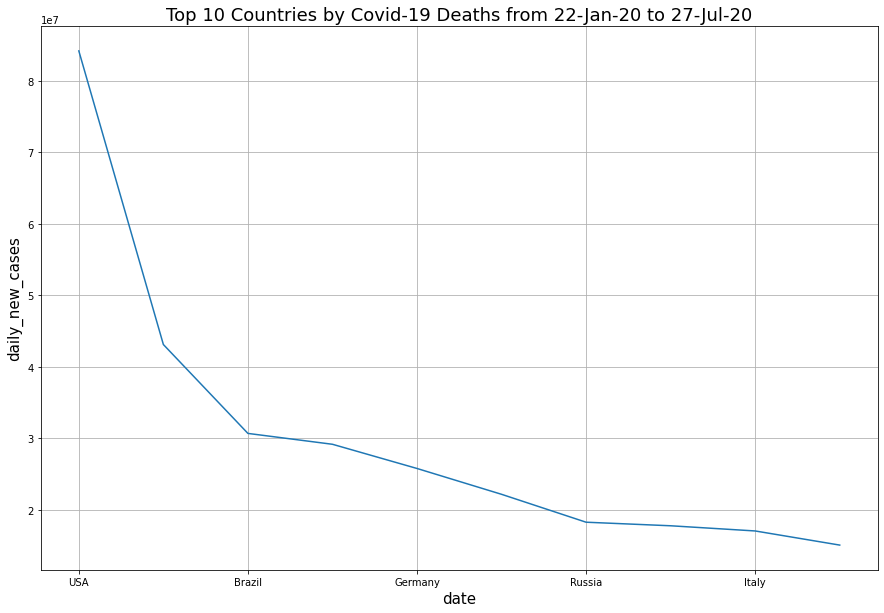

In [26]:


# Plotting Line Chart
%matplotlib inline
import matplotlib.pyplot as plt

# Figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Using Transpose plot to plot columns on x axis
#df3_pandas.plot()
df3_pandas.T.plot(ax=ax)

# Title and labels
plt.title("Top 10 Countries by Covid-19 Deaths from 22-Jan-20 to 27-Jul-20", fontsize = 18)
plt.ylabel('daily_new_cases',fontsize = 15)
plt.xlabel('date', fontsize = 15)
ax.grid(True)
plt.show()

In [147]:
# Question 7)

df1=df.withColumn("cumulative recovered cases", df.cumulative_total_cases - df.active_cases - df.cumulative_total_deaths)

In [148]:
df1.show(50)

+----------+-----------+----------------------+---------------+------------+-----------------------+----------------+--------------------------+
|      date|    country|cumulative_total_cases|daily_new_cases|active_cases|cumulative_total_deaths|daily_new_deaths|cumulative recovered cases|
+----------+-----------+----------------------+---------------+------------+-----------------------+----------------+--------------------------+
|2020-02-15|Afghanistan|                     0|           null|           0|                      0|            null|                       0.0|
|2020-02-16|Afghanistan|                     0|           null|           0|                      0|            null|                       0.0|
|2020-02-17|Afghanistan|                     0|           null|           0|                      0|            null|                       0.0|
|2020-02-18|Afghanistan|                     0|           null|           0|                      0|            null|             

In [151]:
# Question 8)

# converting pyspark to pandas to visualize the dataframe
df2 = df1.toPandas()

# Setting Country/Region as index
df2 = df2.set_index('country')
df2 

,date,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,cumulative recovered cases
country,,,,,,,
Afghanistan,2020-02-15,0,None,0,0,None,0.0
Afghanistan,2020-02-16,0,None,0,0,None,0.0
Afghanistan,2020-02-17,0,None,0,0,None,0.0
Afghanistan,2020-02-18,0,None,0,0,None,0.0
Afghanistan,2020-02-19,0,None,0,0,None,0.0
...,...,...,...,...,...,...,...
Zimbabwe,2022-05-10,248642,106,963,5481,2,242198.0
Zimbabwe,2022-05-11,248778,136,1039,5481,0,242258.0
Zimbabwe,2022-05-12,248943,165,1158,5481,0,242304.0


In [33]:
# Question 10)

# Creating a temp view for dates when first cases were confirmed in a country
df.createOrReplaceTempView("firstcase")
f_first = spark.sql("SELECT `country`, min(date) AS `FirstCaseDate` FROM firstcase WHERE Confirmed > 0 GROUP BY `country`")
f_first.show(3)

In [ ]:
startdate = []
startdate = list(f_first.select('FirstCaseDate').toPandas()['FirstCaseDate']) 
country = list(f_first.select('Country/Region').toPandas()['country'])
country.sort()
startdate[0:5]

In [ ]:
# Extracting confirmed case values for date 90 days after when first case was detected
convert = []
enddate = []

from datetime import datetime
from datetime import timedelta

# converting startdate to datetime from str and adding 90 days
for i in range(0,187):
    convert.append(datetime.strptime(startdate[i], "%Y-%m-%d") + timedelta(days=90))

# converting datetime back to string
for i in range(0,187):
    enddate.append(convert[i].strftime("%Y-%m-%d"))
    
enddate[0:5]

In [ ]:
# Question 11)

df.write.json("file.json")

# Reading json to check the results
df9 = spark.read.json("file.json")
df9.printSchema()
df9.show()

In [ ]:
# Didn't get the desired output for few questions because of the codes being not able to run and execute in the colab. Also, as a result couldn't
#export into json file.